In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [19]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [20]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [21]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [3]:
# Data Overview
def data_overview(df, name):
    print(f"\n{name} Dataset Overview")
    print(df.info())
    print(df.describe(include='all'))
    print(f"\nMissing Values in {name}:\n", df.isnull().sum())

In [4]:
data_overview(customers, "Customers")


Customers Dataset Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3

Missing Values in Customers:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


In [5]:
data_overview(products, "Products")


Products Dataset Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB
None
       ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100                     66        4         NaN
top         P001  ActiveWear Smartwatch    Books         NaN
freq           1                      4       26         NaN
mean         NaN                    NaN      NaN  267.551700
std          NaN                    NaN      NaN  143.219383
min          NaN                    NaN      NaN   16.080000
25%          NaN                    NaN      NaN  147.767500
50%         

In [6]:
data_overview(transactions, "Transactions")


Transactions Dataset Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None
       TransactionID CustomerID ProductID      TransactionDate     Quantity  \
count           1000       1000      1000                 1000  1000.000000   
unique          1000        199       100                 1000          NaN   
top           T00001      C0109      P059  2024-08-25 12:38:23          NaN   
freq               1         11        19                    1    

In [8]:
# Merge datasets for deeper analysis
merged_data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")
merged_data

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00630,C0031,P093,2024-10-08 23:58:14,2,609.88,304.94,Tina Miller,South America,2024-04-11,TechPro Vase,Home Decor,304.94
996,T00672,C0165,P044,2024-07-28 00:09:49,4,75.28,18.82,Juan Mcdaniel,South America,2022-04-09,ActiveWear Running Shoes,Clothing,18.82
997,T00711,C0165,P044,2024-06-11 15:51:14,4,75.28,18.82,Juan Mcdaniel,South America,2022-04-09,ActiveWear Running Shoes,Clothing,18.82
998,T00878,C0165,P044,2024-09-24 21:15:21,3,56.46,18.82,Juan Mcdaniel,South America,2022-04-09,ActiveWear Running Shoes,Clothing,18.82


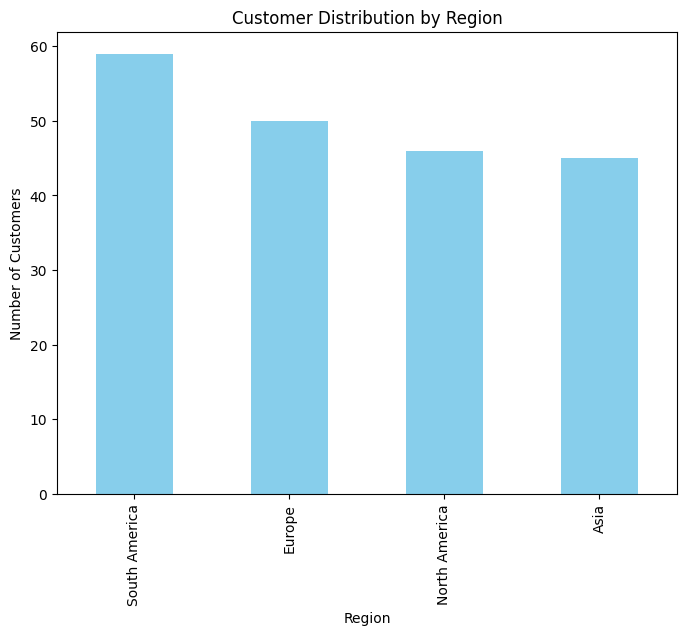

In [9]:
# 1. Customer Distribution by Region
customer_region_dist = customers["Region"].value_counts()
plt.figure(figsize=(8, 6))
customer_region_dist.plot(kind="bar", color="skyblue")
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.show()

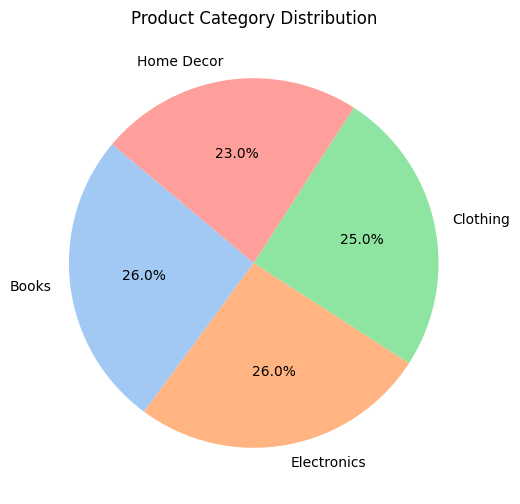

In [10]:
# 2. Product Category Distribution
product_category_dist = products["Category"].value_counts()
plt.figure(figsize=(8, 6))
product_category_dist.plot(kind="pie", autopct="%1.1f%%", startangle=140, colors=sns.color_palette("pastel"))
plt.title("Product Category Distribution")
plt.ylabel("")
plt.show()


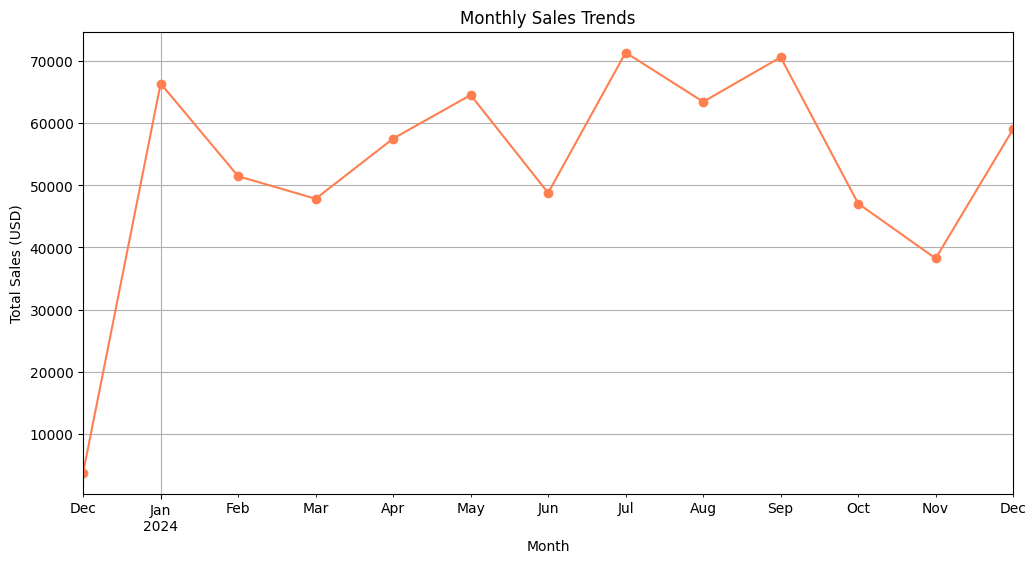

In [11]:
# 3. Monthly Transaction Trends
merged_data["TransactionDate"] = pd.to_datetime(merged_data["TransactionDate"])
merged_data["Month"] = merged_data["TransactionDate"].dt.to_period("M")
monthly_sales = merged_data.groupby("Month")["TotalValue"].sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind="line", marker="o", color="coral")
plt.title("Monthly Sales Trends")
plt.xlabel("Month")
plt.ylabel("Total Sales (USD)")
plt.grid(True)
plt.show()


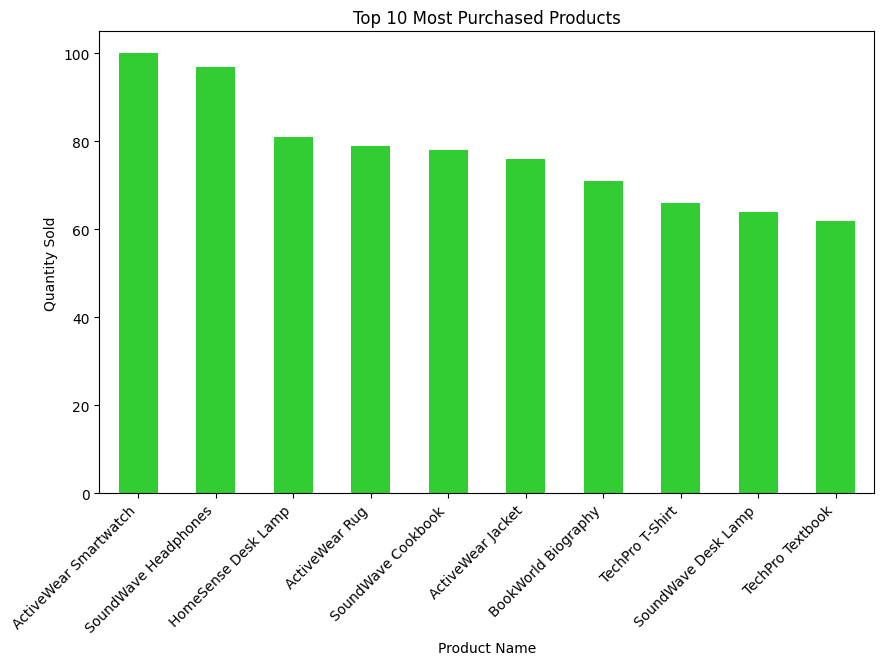

In [12]:
# 4. Most Purchased Products
most_purchased_products = merged_data.groupby("ProductName")["Quantity"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
most_purchased_products.plot(kind="bar", color="limegreen")
plt.title("Top 10 Most Purchased Products")
plt.xlabel("Product Name")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=45, ha="right")
plt.show()

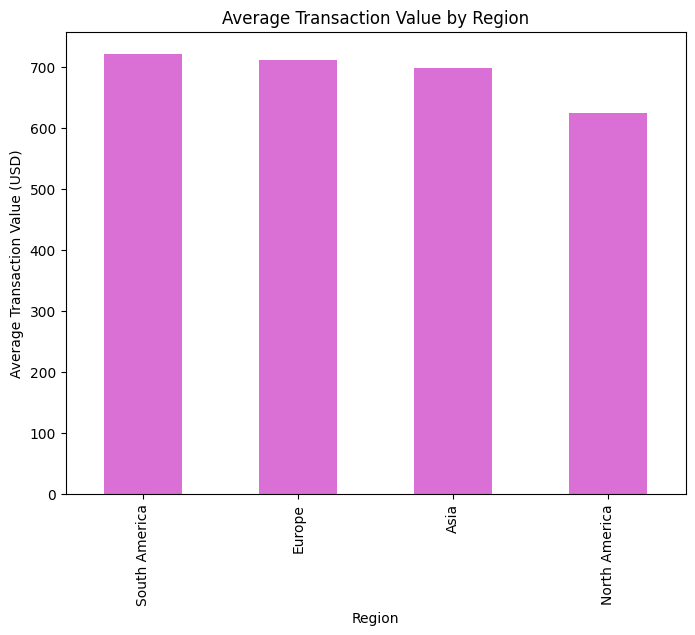

In [13]:
# 5. Average Transaction Value by Region
region_avg_transaction = merged_data.groupby("Region")["TotalValue"].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
region_avg_transaction.plot(kind="bar", color="orchid")
plt.title("Average Transaction Value by Region")
plt.xlabel("Region")
plt.ylabel("Average Transaction Value (USD)")
plt.show()

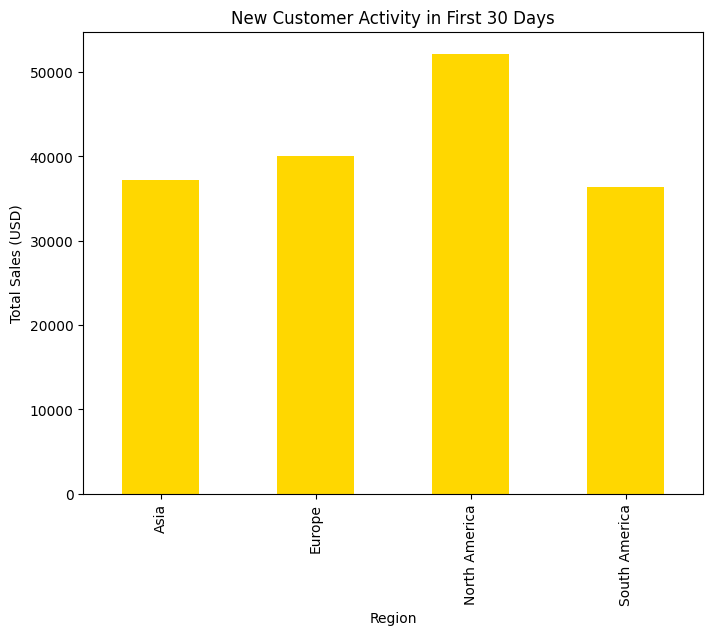

In [14]:
# 6. New Customers Activity in the First 30 Days
merged_data["SignupDate"] = pd.to_datetime(merged_data["SignupDate"])
merged_data["DaysSinceSignup"] = (merged_data["TransactionDate"] - merged_data["SignupDate"]).dt.days
new_customer_activity = merged_data[merged_data["DaysSinceSignup"] <= 30].groupby("Region")["TotalValue"].sum()
plt.figure(figsize=(8, 6))
new_customer_activity.plot(kind="bar", color="gold")
plt.title("New Customer Activity in First 30 Days")
plt.xlabel("Region")
plt.ylabel("Total Sales (USD)")
plt.show()


In [15]:
# 7. Revenue Contribution by Repeat Customers
repeat_customers = merged_data.groupby("CustomerID").filter(lambda x: len(x) > 1)
repeat_customer_revenue = repeat_customers["TotalValue"].sum()
total_revenue = merged_data["TotalValue"].sum()
repeat_revenue_percentage = (repeat_customer_revenue / total_revenue) * 100
print(f"Repeat customers contribute {repeat_revenue_percentage:.2f}% of total revenue.")


Repeat customers contribute 99.08% of total revenue.


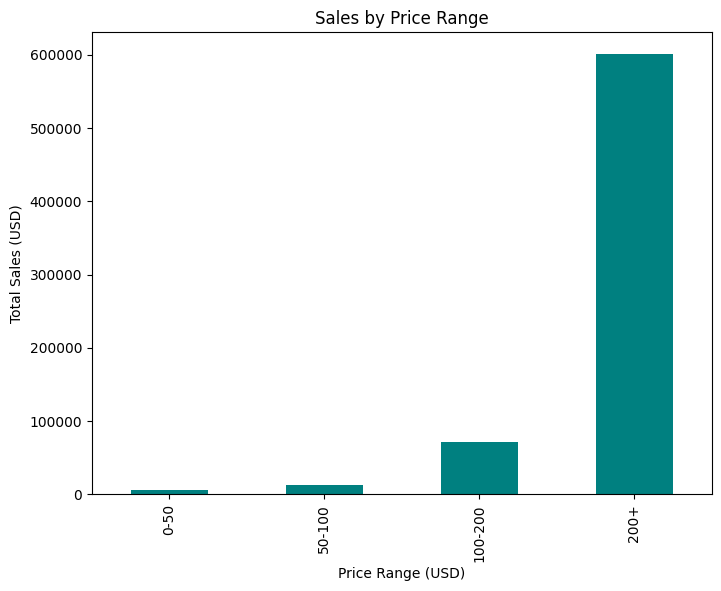

In [22]:
# 8. Price Range Analysis
merged_data["PriceRange"] = pd.cut(merged_data["Price_x"], bins=[0, 50, 100, 200, 1000], labels=["0-50", "50-100", "100-200", "200+"])
price_range_sales = merged_data.groupby("PriceRange")["TotalValue"].sum()
plt.figure(figsize=(8, 6))
price_range_sales.plot(kind="bar", color="teal")
plt.title("Sales by Price Range")
plt.xlabel("Price Range (USD)")
plt.ylabel("Total Sales (USD)")
plt.show()

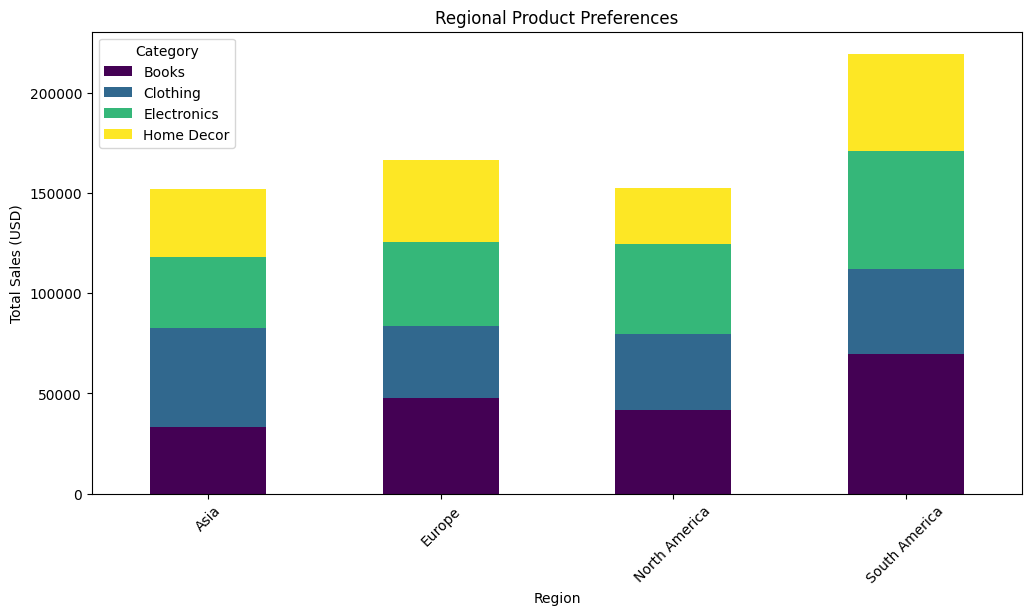

In [17]:
# 9. Regional Product Preferences
regional_product_preferences = merged_data.groupby(["Region", "Category"])["TotalValue"].sum().unstack()
regional_product_preferences.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="viridis")
plt.title("Regional Product Preferences")
plt.xlabel("Region")
plt.ylabel("Total Sales (USD)")
plt.legend(title="Category")
plt.xticks(rotation=45)
plt.show()

In [18]:
# 10. Weekend vs Weekday Sales
merged_data["DayOfWeek"] = merged_data["TransactionDate"].dt.dayofweek
weekend_sales = merged_data[merged_data["DayOfWeek"] >= 5]["TotalValue"].sum()
weekday_sales = merged_data[merged_data["DayOfWeek"] < 5]["TotalValue"].sum()
print(f"Weekend sales account for {(weekend_sales / total_revenue) * 100:.2f}% of total sales.")

Weekend sales account for 25.22% of total sales.


In [ ]:
business insights is in separate file